In [203]:
import pandas as pd 
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from surprise import Reader, Dataset, accuracy, SVD, SVDpp, SlopeOne, NMF, NormalPredictor, KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering
from surprise.model_selection import KFold, cross_validate, train_test_split
%matplotlib inline
warnings.filterwarnings('ignore')

In [204]:
df = pd.read_csv('/home/vabows/trab-cienciadedados/Data-Science-Project/Data Science/ratings.csv', sep=',',header=0, names=['userId','movieId','rating','timestamp'])
df.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [205]:
movie_titles = pd.read_csv('/home/vabows/trab-cienciadedados/Data-Science-Project/Data Science/movies.csv', header=0)
movie_titles.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [206]:
df = pd.merge(df, movie_titles, on='movieId')
df.head()
df.describe()

userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09

In [207]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

rating
title                                          
'71 (2014)                                  4.0
'Hellboy': The Seeds of Creation (2004)     4.0
'Round Midnight (1986)                      3.5
'Salem's Lot (2004)                         5.0
'Til There Was You (1997)                   4.0

In [208]:
ratings['number_of_ratings'] = df.groupby('title')['rating'].count()
ratings.head()

rating  number_of_ratings
title                                                             
'71 (2014)                                  4.0                  1
'Hellboy': The Seeds of Creation (2004)     4.0                  1
'Round Midnight (1986)                      3.5                  2
'Salem's Lot (2004)                         5.0                  1
'Til There Was You (1997)                   4.0                  2

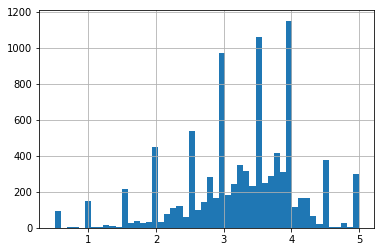

In [209]:
ratings['rating'].hist(bins=50)

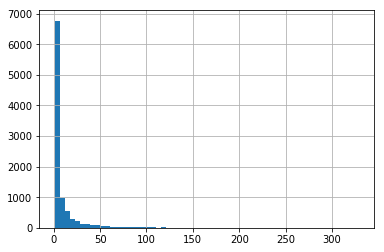

In [210]:
ratings['number_of_ratings'].hist(bins=60)

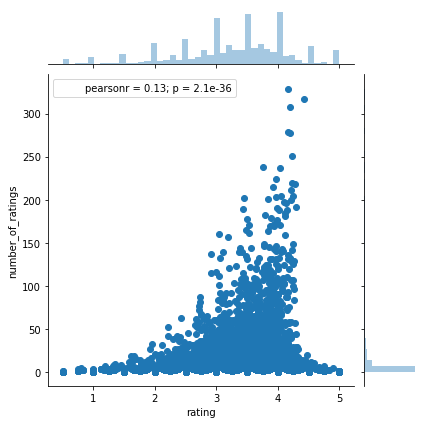

In [211]:
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)


In [212]:
movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head()

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              NaN                                      NaN   
2              NaN                                      NaN   
3              NaN                                      NaN   
4              NaN                                      NaN   
5              NaN                                      NaN   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          NaN                  NaN   
2                          NaN                  NaN   
3                          NaN                  NaN   
4                          NaN                  NaN   
5                          NaN                  NaN   

title   'Til There Was You (1997)  'Tis the Season for Love (2015)  \
userId                                                               
1                             NaN                              NaN   
2                             NaN                              NaN   
3                             NaN                              NaN   
4                             NaN                              NaN   
5                             NaN                              NaN   

title   'burbs, The (1989)  'night Mother (1986)  (500) Days of Summer (2009)  \
userId                                                                          
1                      NaN                   NaN                          NaN   
2                      NaN                   NaN                          NaN   
3                      NaN                   NaN                          NaN   
4                      NaN                   NaN                          NaN   
5                      NaN                   NaN                          NaN   

title   *batteries not included (1987)  \
userId                                   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   
5                                  NaN   

title                     ...                      Zulu (2013)  [REC] (2007)  \
userId                    ...                                                  
1                         ...                              NaN           NaN   
2                         ...                              NaN           NaN   
3                         ...                              NaN           NaN   
4                         ...                              NaN           NaN   
5                         ...                              NaN           NaN   

title   [REC]² (2009)  [REC]³ 3 Génesis (2012)  \
userId                                           
1                 NaN                      NaN   
2                 NaN                      NaN   
3                 NaN                      NaN   
4                 NaN                      NaN   
5                 NaN                      NaN   

title   anohana: The Flower We Saw That Day - The Movie (2013)  \
userId                                                           
1                                                     NaN        
2                                                     NaN        
3                                                     NaN        
4                                                     NaN        
5                                                     NaN        

title   eXistenZ (1999)  xXx (2002)  xXx: State of the Union (2005)  \
userId                                                                
1                   NaN         NaN                             NaN   
2                   NaN         NaN                             NaN   
3                   NaN         NaN                             NaN   
4                   NaN         NaN                             NaN   
5                

In [213]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)


rating  number_of_ratings
title                                                                 
Forrest Gump (1994)                        4.164134                329
Shawshank Redemption, The (1994)           4.429022                317
Pulp Fiction (1994)                        4.197068                307
Silence of the Lambs, The (1991)           4.161290                279
Matrix, The (1999)                         4.192446                278
Star Wars: Episode IV - A New Hope (1977)  4.231076                251
Jurassic Park (1993)                       3.750000                238
Braveheart (1995)                          4.031646                237
Terminator 2: Judgment Day (1991)          3.970982                224
Schindler's List (1993)                    4.225000                220

In [214]:
AFO_user_rating = movie_matrix['Air Force One (1997)']
contact_user_rating = movie_matrix['Contact (1997)']

In [215]:
AFO_user_rating.tail()
#contact_user_rating.head()

userId
606    NaN
607    NaN
608    3.0
609    NaN
610    NaN
Name: Air Force One (1997), dtype: float64

In [216]:
similar_to_air_force_one=movie_matrix.corrwith(AFO_user_rating)


In [217]:
similar_to_air_force_one.head()


title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [218]:
similar_to_contact = movie_matrix.corrwith(contact_user_rating)
similar_to_contact.head()

title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [219]:
corr_contact = pd.DataFrame(similar_to_contact, columns=['Correlation'])
corr_contact.dropna(inplace=True)
corr_contact.head()
corr_AFO = pd.DataFrame(similar_to_air_force_one, columns=['correlation'])
corr_AFO.dropna(inplace=True)
corr_AFO.head()

correlation
title                                      
'burbs, The (1989)                 0.168459
(500) Days of Summer (2009)        0.086874
*batteries not included (1987)    -0.866025
10 Cloverfield Lane (2016)         0.192450
10 Items or Less (2006)           -1.000000

In [220]:
corr_AFO = corr_AFO.join(ratings['number_of_ratings'])
corr_contact = corr_contact.join(ratings['number_of_ratings'])
corr_AFO .head()
corr_contact.head()
corr_AFO[corr_AFO['number_of_ratings'] > 100].sort_values(by='correlation', ascending=False).head(10)
corr_contact[corr_contact['number_of_ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)

Correlation  number_of_ratings
title                                                             
Sleepless in Seattle (1993)            0.689602                106
American Pie (1999)                    0.670109                103
Clear and Present Danger (1994)        0.641203                110
Firm, The (1993)                       0.640332                101
Bourne Identity, The (2002)            0.639769                112
Outbreak (1995)                        0.586934                101
E.T. the Extra-Terrestrial (1982)      0.569043                122
Apollo 13 (1995)                       0.563138                201
Die Hard: With a Vengeance (1995)      0.552904                144
Four Weddings and a Funeral (1994)     0.542013                103

In [221]:
#Usando a biblioteca surprise par melhorar

In [222]:
reader = Reader()
df = df.drop(['title', 'genres'], axis=1)
df.head()

userId  movieId  rating   timestamp
0       1        1     4.0   964982703
1       5        1     4.0   847434962
2       7        1     4.5  1106635946
3      15        1     2.5  1510577970
4      17        1     4.5  1305696483

In [328]:
benchmark = []
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


test_rmse    fit_time  test_time
Algorithm                                        
SVDpp             0.867685  226.180763   7.353474
BaselineOnly      0.876803    0.079092   0.131229
SVD               0.880110    2.101856   0.155839
KNNBaseline       0.882351    0.107277   1.351188
KNNWithZScore     0.904089    0.071430   1.239303
KNNWithMeans      0.905137    0.047705   1.150976
SlopeOne          0.908828    2.136751   4.052205
NMF               0.933162    2.537918   0.138448
CoClustering      0.950032    0.912013   0.133048
KNNBasic          0.957920    0.036858   1.074749
NormalPredictor   1.424919    0.045637   0.147614

In [223]:
#Vamos usar o melhor algoritmo que foi o SVDpp que teve o menor erro

In [224]:
kf = KFold(n_splits=5)
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

In [225]:
svdpp = BaselineOnly()

In [226]:
for trainset, testset in kf.split(data):
    svdpp.fit(trainset)
    predictions = svdpp.test(testset)
    accuracy.rmse(predictions, verbose=True)

Estimating biases using als...
RMSE: 0.8755
Estimating biases using als...
RMSE: 0.8729
Estimating biases using als...
RMSE: 0.8594
Estimating biases using als...
RMSE: 0.8729
Estimating biases using als...
RMSE: 0.8809


In [227]:
df[df['userId']==1].head()

userId  movieId  rating  timestamp
0         1        1     4.0  964982703
215       1        3     4.0  964981247
267       1        6     4.0  964982224
369       1       47     5.0  964983815
572       1       50     5.0  964982931

In [228]:
svdpp.predict(1,302,3)

Prediction(uid=1, iid=302, r_ui=3, est=4.08865181756168, details={'was_impossible': False})

In [251]:
movie_titles['estimation'] = movie_titles['movieId'].apply(lambda x: svdpp.predict(1, x).est)

In [254]:
movie_titles.sort_values('estimation', ascending=False)

movieId                                              title  \
277       318                   Shawshank Redemption, The (1994)   
906      1204                          Lawrence of Arabia (1962)   
659       858                              Godfather, The (1972)   
602       750  Dr. Strangelove or: How I Learned to Stop Worr...   
2226     2959                                  Fight Club (1999)   
46         50                         Usual Suspects, The (1995)   
461       527                            Schindler's List (1993)   
899      1197                         Princess Bride, The (1987)   
975      1276                              Cool Hand Luke (1967)   
694       912                                  Casablanca (1942)   
224       260          Star Wars: Episode IV - A New Hope (1977)   
898      1196  Star Wars: Episode V - The Empire Strikes Back...   
828      1089                              Reservoir Dogs (1992)   
900      1198  Raiders of the Lost Ark (Indiana Jones and the...   
2996     4011                                      Snatch (2000)   
914      1213                                  Goodfellas (1990)   
686       904                                 Rear Window (1954)   
3622     4973  Amelie (Fabuleux destin d'Amélie Poulain, Le) ...   
6710    58559                            Dark Knight, The (2008)   
922      1221                     Godfather: Part II, The (1974)   
4909     7361       Eternal Sunshine of the Spotless Mind (2004)   
909      1208                              Apocalypse Now (1979)   
1734     2329                          American History X (1998)   
314       356                                Forrest Gump (1994)   
896      1193             One Flew Over the Cuckoo's Nest (1975)   
6315    48516                               Departed, The (2006)   
863      1136             Monty Python and the Holy Grail (1975)   
1939     2571                                 Matrix, The (1999)   
257       296                                Pulp Fiction (1994)   
901      1199                                      Brazil (1985)   
...       ...                                                ...   
2435     3248             Sister Act 2: Back in the Habit (1993)   
5180     8387           Police Academy: Mission to Moscow (1994)   
4404     6482     Dumb and Dumberer: When Harry Met Lloyd (2003)   
2455     3268                  Stop! Or My Mom Will Shoot (1992)   
478       546                           Super Mario Bros. (1993)   
1790     2389                                      Psycho (1998)   
2860     3826                                  Hollow Man (2000)   
313       355                            Flintstones, The (1994)   
1064     1381                                    Grease 2 (1982)   
396       455                                  Free Willy (1993)   
1812     2412                                     Rocky V (1990)   
1989     2643            Superman IV: The Quest for Peace (1987)   
332       374                                 Richie Rich (1994)   
1312     1760                                 Spice World (1997)   
163       193                                   Showgirls (1995)   
1743     2338       I Still Know What You Did Last Summer (1998)   
2717     3646                           Big Momma's House (2000)   
1822     2422                   Karate Kid, Part III, The (1989)   
2984     3997                          Dungeons & Dragons (2000)   
1235     1644             I Know What You Did Last Summer (1997)   
379       435                                   Coneheads (1993)   
5270     8666                                    Catwoman (2004)   
2662     3564         Flintstones in Viva Rock Vegas, The (2000)   
1174     1562                              Batman & Robin (1997)   
2683     3593                           Battlefield Earth (2000)   
1145     1499                                    Anaconda (1997)   
2029     2701                              Wild Wild West (199